In [1]:
import gym
import matplotlib.pyplot as plt
import collections

### q learning method

In [2]:
def play_random_steps(environ,t_count, reward_table, transit_table):
    s = environ.reset()
    for _ in range(t_count):
        a = environ.action_space.sample()
        ns, r, done, info = environ.step(a)
        reward_table[(s,a,ns)] = r
        transit_table[(s,a)][ns] += 1
        s = environ.reset() if done else ns

def select_action(environ,value_table, state):
    best_action, best_value = None, None
    
    for action in range(environ.action_space.n):
        # q value를 그때그때 계산해서 최댓값인 a를 액션으로 선택함 --> q learing과 차이/ qlenaring은 qvalue자체를 학습함
        action_value = value_table[(state, action)]
        if best_value is None or best_value < action_value:
            best_value = action_value
            best_action = action
    
    return best_action

def play_episode(environ, transit_table, reward_table, value_table):
    total_reward = 0.
    s = environ.reset()
    while True:
        a = select_action(environ,value_table, s)
        ns, r, done, info = environ.step(a)
        reward_table[(s, a, ns)] = r
        transit_table[(s,a)][ns] += 1
        total_reward += r
        if done:
            break
        s = ns
    return total_reward

def value_iteration(environ,transit_table, reward_table, value_table,):
    for state in range(environ.observation_space.n):
        for action in range(environ.action_space.n):
            action_value = 0.
            target_count = transit_table[(state, action)]
            total = sum(target_count.values())

            for tgt_state, count in target_count.items():

                r = reward_table[(state, action, tgt_state)]
                # print(r, count, total)
                best_action = select_action(environ,value_table, tgt_state)
                action_value += (count/total) * (r + gamma*value_table[(tgt_state, best_action)])
            value_table[(state, action)] = action_value
        

In [3]:
%%time
# action = 0 or 1 or 2 or 3
# reward는 도착을해야만 1을 받음 나머지는 0
# state는 0~16까지
env = gym.make("FrozenLake-v1", is_slippery = True)
# env.render()
gamma = 0.9
n_test_episode = 20
n_random_valueiter = 100

reward_table = collections.defaultdict(float)
transit_table = collections.defaultdict(collections.Counter)
value_table = collections.defaultdict(float)

r_cum = []
iter_no = 0
best_reward = 0.
while True:
    iter_no += 1
    play_random_steps(env, n_random_valueiter, reward_table, transit_table)
    value_iteration(env, transit_table, reward_table, value_table,)
    reward = 0
    for _ in range(n_test_episode):
        reward += play_episode(env, transit_table, reward_table,value_table)
    reward /= n_test_episode
    r_cum.append(reward)
    if reward > best_reward:
        print(f"best reward updated {best_reward} --> {reward}")
        best_reward = reward
    if reward > 0.8:
        print(f"solved in {iter_no} iterations!")
        break
    # print(f"iteration: {iter_no}, best_reward: {best_reward}")


best reward updated 0.0 --> 0.2
best reward updated 0.2 --> 0.45
best reward updated 0.45 --> 0.5
best reward updated 0.5 --> 0.6
best reward updated 0.6 --> 0.7
best reward updated 0.7 --> 0.9
solved in 20 iterations!
CPU times: total: 250 ms
Wall time: 265 ms


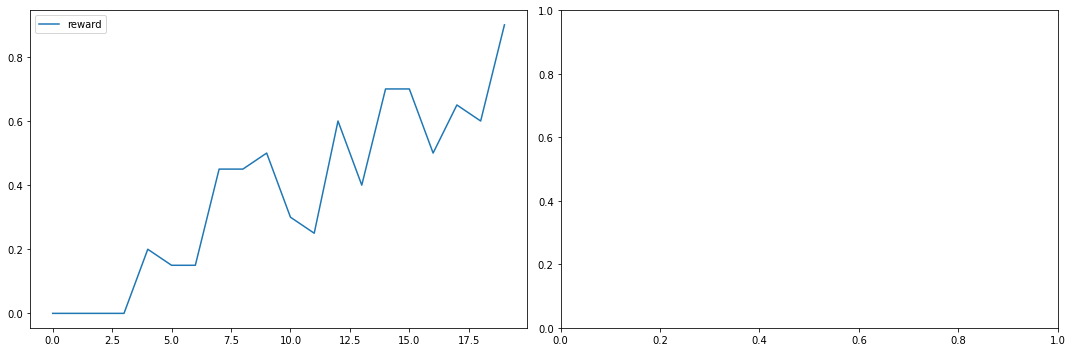

In [4]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(r_cum, label='reward')
axes[0].legend()
fig.tight_layout()

In [5]:
reward_table

defaultdict(float,
            {(0, 3, 0): 0.0,
             (0, 1, 1): 0.0,
             (1, 2, 5): 0.0,
             (0, 0, 4): 0.0,
             (4, 1, 5): 0.0,
             (0, 1, 4): 0.0,
             (4, 0, 8): 0.0,
             (8, 2, 4): 0.0,
             (4, 3, 4): 0.0,
             (4, 3, 0): 0.0,
             (1, 3, 2): 0.0,
             (2, 0, 1): 0.0,
             (1, 2, 1): 0.0,
             (1, 1, 5): 0.0,
             (4, 1, 4): 0.0,
             (4, 0, 4): 0.0,
             (4, 2, 0): 0.0,
             (4, 3, 5): 0.0,
             (0, 3, 1): 0.0,
             (2, 0, 2): 0.0,
             (1, 0, 0): 0.0,
             (1, 0, 1): 0.0,
             (1, 0, 5): 0.0,
             (0, 2, 1): 0.0,
             (0, 2, 4): 0.0,
             (1, 1, 0): 0.0,
             (8, 3, 4): 0.0,
             (4, 0, 0): 0.0,
             (0, 0, 0): 0.0,
             (4, 2, 5): 0.0,
             (4, 2, 8): 0.0,
             (0, 2, 0): 0.0,
             (0, 1, 0): 0.0,
             (1, 1, 2): 

In [6]:
value_table

defaultdict(float,
            {(4, 0): 0.10704284305314107,
             (4, 1): 0.08926588430941945,
             (4, 2): 0.06931640851759048,
             (4, 3): 0.0629750550964015,
             (0, 0): 0.0921090405850517,
             (0, 1): 0.08375427474518349,
             (0, 2): 0.08428605988768628,
             (0, 3): 0.07792665943594573,
             (1, 0): 0.04140487879814192,
             (1, 1): 0.05234250142104952,
             (1, 2): 0.04634306729700041,
             (1, 3): 0.07297653580493706,
             (5, 0): 0.0,
             (5, 1): 0.0,
             (5, 2): 0.0,
             (5, 3): 0.0,
             (2, 0): 0.07354057900593183,
             (2, 1): 0.0690030372251986,
             (2, 2): 0.06834392191170495,
             (2, 3): 0.06252373452149373,
             (6, 0): 0.081592202475834,
             (6, 1): 0.08415981603758323,
             (6, 2): 0.09628976456915765,
             (6, 3): 0.013237304221067732,
             (3, 0): 0.04396294329385623,

In [7]:
transit_table

defaultdict(collections.Counter,
            {(0, 3): Counter({0: 140, 1: 73}),
             (0, 1): Counter({1: 74, 4: 69, 0: 71}),
             (1, 2): Counter({5: 29, 1: 30, 2: 32}),
             (0, 0): Counter({4: 1311, 0: 2451}),
             (4, 1): Counter({5: 21, 4: 35, 8: 33}),
             (4, 0): Counter({8: 957, 4: 993, 0: 1000}),
             (8, 2): Counter({4: 8, 9: 17, 12: 8}),
             (4, 3): Counter({4: 26, 0: 26, 5: 22}),
             (1, 3): Counter({2: 126, 1: 126, 0: 126}),
             (2, 0): Counter({1: 87, 2: 63, 6: 85}),
             (1, 1): Counter({5: 19, 0: 18, 2: 29}),
             (4, 2): Counter({0: 41, 5: 45, 8: 37}),
             (1, 0): Counter({0: 25, 1: 26, 5: 42}),
             (0, 2): Counter({1: 190, 4: 195, 0: 188}),
             (8, 3): Counter({4: 523, 9: 517, 8: 541}),
             (2, 1): Counter({6: 14, 3: 15, 1: 14}),
             (6, 3): Counter({2: 2, 7: 3, 5: 5}),
             (3, 2): Counter({3: 12, 7: 4}),
             (8, 1): 